<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Titanic_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

In [54]:
train = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_test.csv')
test = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_train.csv')

In [55]:
test
test.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1, inplace=True)

In [58]:
test
test.drop(test.index[418:])

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
413,414,0
414,415,1
415,416,0
416,417,1


In [50]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
train['Survived'] = test['Survived'].values

ValueError: ignored

In [12]:
train.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


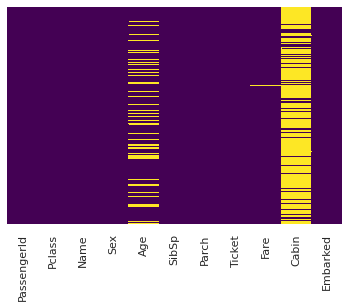

In [13]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

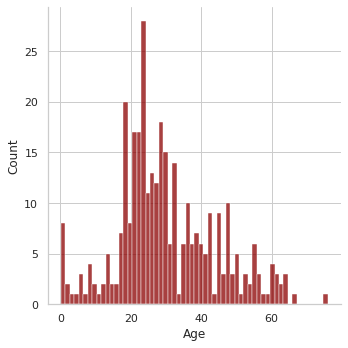

In [15]:
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=60)


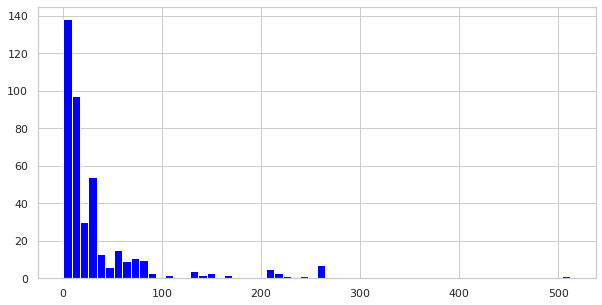

In [17]:
train['Fare'].hist(color='blue', bins=60, figsize=(10,5))

In [18]:
cf.go_offline()

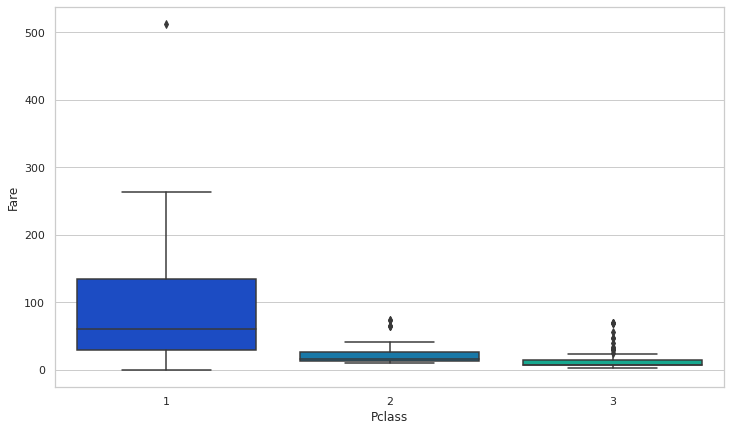

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Fare', data=train, palette='winter')

In [34]:
def input_Fare(cols):
    
  Fare = cols[0]
  
  Pclass = cols[1]

  if pd.isnull(Fare):

    if Pclass == 1:
      
      return 75
    elif Pclass == 2:
      return 25
   
    else:
      return 15
  else:
    return Fare

In [35]:
train['Fare'] = train[['Fare', 'Pclass']].apply(input_Fare, axis=1)

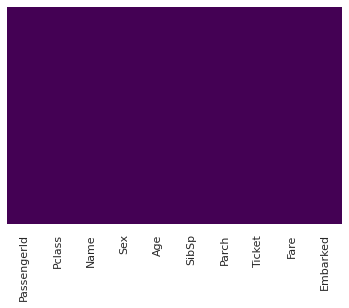

In [36]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [37]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,15.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,15.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,25.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,15.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,15.0,S


In [38]:
train.dropna(inplace=True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


In [40]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [41]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,15.0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,15.0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,25.0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,15.0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,15.0,S


In [42]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [43]:
train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [44]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,15.0
1,893,3,47.0,1,0,15.0
2,894,2,62.0,0,0,25.0
3,895,3,27.0,0,0,15.0
4,896,3,22.0,1,1,15.0


In [45]:
train = pd.concat([train, sex, embark], axis=1)

In [46]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,15.0,1,1,0
1,893,3,47.0,1,0,15.0,0,0,1
2,894,2,62.0,0,0,25.0,1,1,0
3,895,3,27.0,0,0,15.0,1,0,1
4,896,3,22.0,1,1,15.0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression